## French employment, salaries, population per town data analysis

In [1]:
# Import required libaries
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
# Load data
firm_data = pd.read_csv('base_etablissement_par_tranche_effectif.csv')
geo_data = pd.read_csv('name_geographic_information.csv')
salary_data = pd.read_csv('net_salary_per_town_categories.csv')
pop_data = pd.read_csv('population.csv')
town_geodata = gpd.read_file('communes.geojson')
dept_geodata = gpd.read_file('departements.geojson')

C:\Users\lim_j\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Obtain basic information about datasets

In [3]:
firm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
CODGEO      36681 non-null object
LIBGEO      36681 non-null object
REG         36681 non-null int64
DEP         36681 non-null object
E14TST      36681 non-null int64
E14TS0ND    36681 non-null int64
E14TS1      36681 non-null int64
E14TS6      36681 non-null int64
E14TS10     36681 non-null int64
E14TS20     36681 non-null int64
E14TS50     36681 non-null int64
E14TS100    36681 non-null int64
E14TS200    36681 non-null int64
E14TS500    36681 non-null int64
dtypes: int64(11), object(3)
memory usage: 3.9+ MB


In [4]:
geo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 14 columns):
EU_circo                  36840 non-null object
code_région               36840 non-null int64
nom_région                36840 non-null object
chef.lieu_région          36840 non-null object
numéro_département        36840 non-null object
nom_département           36840 non-null object
préfecture                36840 non-null object
numéro_circonscription    36840 non-null int64
nom_commune               36840 non-null object
codes_postaux             36840 non-null object
code_insee                36840 non-null int64
latitude                  33911 non-null float64
longitude                 33999 non-null object
éloignement               33878 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.9+ MB


In [5]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Data columns (total 26 columns):
CODGEO       5136 non-null object
LIBGEO       5136 non-null object
SNHM14       5136 non-null float64
SNHMC14      5136 non-null float64
SNHMP14      5136 non-null float64
SNHME14      5136 non-null float64
SNHMO14      5136 non-null float64
SNHMF14      5136 non-null float64
SNHMFC14     5136 non-null float64
SNHMFP14     5136 non-null float64
SNHMFE14     5136 non-null float64
SNHMFO14     5136 non-null float64
SNHMH14      5136 non-null float64
SNHMHC14     5136 non-null float64
SNHMHP14     5136 non-null float64
SNHMHE14     5136 non-null float64
SNHMHO14     5136 non-null float64
SNHM1814     5136 non-null float64
SNHM2614     5136 non-null float64
SNHM5014     5136 non-null float64
SNHMF1814    5136 non-null float64
SNHMF2614    5136 non-null float64
SNHMF5014    5136 non-null float64
SNHMH1814    5136 non-null float64
SNHMH2614    5136 non-null float64
SNHMH5014    5136 no

In [6]:
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536584 entries, 0 to 8536583
Data columns (total 7 columns):
NIVGEO       object
CODGEO       object
LIBGEO       object
MOCO         int64
AGEQ80_17    int64
SEXE         int64
NB           int64
dtypes: int64(4), object(3)
memory usage: 455.9+ MB


### Summary statistics of 4 csv datasets

In [7]:
firm_data.describe()

,REG,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
count,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000
mean,49.415365,123.456067,83.555301,27.291486,5.220550,3.800333,2.296448,0.738339,0.332434,0.172760,0.048417
std,25.451207,2353.384846,1729.874812,432.062116,83.685519,60.961216,32.597382,9.882131,4.850211,2.783668,1.091031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,8.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,19.000000,14.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73.000000,54.000000,39.000000,11.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,94.000000,427385.000000,316603.000000,76368.000000,14836.000000,10829.000000,5643.000000,1658.000000,812.000000,456.000000,180.000000


In [8]:
geo_data.describe()

,code_région,numéro_circonscription,code_insee,latitude,éloignement
count,36840.000000,36840.000000,36840.000000,33911.000000,33878.000000
mean,49.409881,3.818594,46298.368621,47.000659,1.471278
std,25.475629,3.042461,25529.124657,2.209990,0.558343
min,1.000000,1.000000,1001.000000,41.391667,-1.000000
25%,25.000000,2.000000,24576.750000,45.216667,1.140000
50%,43.000000,3.000000,48190.500000,47.433333,1.480000
75%,73.000000,5.000000,67043.250000,48.850000,1.820000
max,94.000000,24.000000,97617.000000,51.083333,3.000000


In [9]:
salary_data.describe()

,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,SNHMFE14,SNHMFO14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
count,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,...,5136.000000,5136.000000,5136.000000,5136.00000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000
mean,13.706386,23.703836,14.575876,10.564505,11.235650,12.038026,20.220502,13.274260,10.308879,9.827161,...,11.498189,9.549766,13.495444,15.87722,9.161565,12.055160,13.174143,9.820872,14.485981,17.679809
std,2.559329,2.836183,1.490110,0.811775,1.221755,1.787995,2.327550,0.990166,0.747563,1.104684,...,1.289598,0.997444,2.363144,3.58586,0.453023,1.825306,2.249391,1.539949,2.852490,4.530257
min,10.200000,16.000000,11.600000,8.700000,8.300000,9.300000,12.000000,10.600000,8.700000,6.100000,...,8.900000,7.900000,9.700000,10.50000,7.500000,9.100000,9.500000,7.800000,9.600000,10.800000
25%,12.100000,21.900000,13.800000,10.000000,10.600000,10.900000,18.800000,12.600000,9.800000,9.200000,...,10.800000,9.200000,12.000000,13.70000,8.900000,10.900000,11.700000,9.400000,12.700000,14.900000
50%,13.000000,23.200000,14.400000,10.400000,11.000000,11.500000,20.000000,13.100000,10.100000,9.700000,...,11.300000,9.500000,12.900000,15.00000,9.100000,11.600000,12.600000,9.700000,13.800000,16.600000
75%,14.400000,24.900000,15.100000,10.900000,11.600000,12.700000,21.400000,13.800000,10.600000,10.200000,...,11.900000,9.700000,14.300000,16.90000,9.400000,12.700000,14.000000,10.000000,15.500000,19.000000
max,43.300000,51.500000,54.600000,17.500000,46.300000,26.700000,35.500000,19.000000,16.100000,28.100000,...,53.200000,60.600000,38.100000,56.90000,12.000000,26.600000,31.000000,93.300000,45.400000,68.600000


In [10]:
pop_data.describe()

,MOCO,AGEQ80_17,SEXE,NB
count,8.536584e+06,8.536584e+06,8536584.0,8.536584e+06
mean,2.171429e+01,4.000000e+01,1.5,7.446743e+00
std,7.591618e+00,2.449490e+01,0.5,1.010993e+02
min,1.100000e+01,0.000000e+00,1.0,0.000000e+00
25%,1.200000e+01,2.000000e+01,1.0,0.000000e+00
50%,2.200000e+01,4.000000e+01,1.5,0.000000e+00
75%,3.100000e+01,6.000000e+01,2.0,3.000000e+00
max,3.200000e+01,8.000000e+01,2.0,4.887300e+04


In [11]:
firm_data.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


In [12]:
geo_data.head()

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.4,1.01


In [13]:
salary_data.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


In [14]:
pop_data.head()

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,COM,1001,L'Abergement-Clémenciat,11,0,1,15
1,COM,1001,L'Abergement-Clémenciat,11,0,2,15
2,COM,1001,L'Abergement-Clémenciat,11,5,1,20
3,COM,1001,L'Abergement-Clémenciat,11,5,2,20
4,COM,1001,L'Abergement-Clémenciat,11,10,1,20


### Prep data, ensure consistency amongst datasets

In [15]:
# Data cleaning/preparation, renaming column of geo_data to be consistent with other dataframes
geo_data.rename(index=str, inplace=True, columns={"code_insee": "CODGEO"})

# Adding a 0 in front of CODGEO column of datasets where it is 4 char instead of 5 char
geo_data['CODGEO'] = geo_data['CODGEO'].apply(lambda code: ''.join(['0', str(code)]) if len(str(code)) == 4 else str(code))
pop_data['CODGEO'] = pop_data['CODGEO'].apply(lambda code: ''.join(['0', str(code)]) if len(str(code)) == 4 else str(code))

### Descriptive Statistics
#### Visualisation 1 - Breakdown of Gender Composition in French regions (Figure 1.1)

In [16]:
### Data preparation/wrangling ###

# Grouping and summing up population by town, gender
pop_gender_town_data = pop_data.groupby(['CODGEO', 'SEXE'])[["NB"]].sum().reset_index()
# Joining datasets to be able to retrieve the region each town is in
pop_gender_town_geodata = pop_gender_town_data.set_index('CODGEO').join(geo_data.set_index('CODGEO'), how='inner').reset_index()
# Grouping and summing up population again by region, gender
pop_gender_region_geodata = pop_gender_town_geodata.groupby(['nom_région', 'SEXE'])[['NB']].sum().reset_index()

# Obtain total population per region and renaming column to 'TOTAL_NB'
total_pop_region_geodata = pop_gender_region_geodata.groupby(['nom_région'])[['NB']].sum()
total_pop_region_geodata.rename(columns={'NB': 'TOTAL_NB'}, inplace=True)

# Joining total population dataframe with population by gender, region geo dataframe
pop_gender_region_geodata = pop_gender_region_geodata.set_index('nom_région').join(total_pop_region_geodata, how='left')

# Compute proportion of gender population of region to total population of region for each gender (Women/Men)
pop_gender_region_geodata['Gender_Percent'] = pop_gender_region_geodata['NB']/pop_gender_region_geodata['TOTAL_NB']

# Drop columns not used for visualisation (Aggregated count of gender population and total population)
pop_gender_region_geodata.reset_index()
pop_gender_region_geodata.drop(['NB', 'TOTAL_NB'], inplace=True, axis=1)

# Breakdown men and women population data into 2 separate dataframes
pop_men_region_geodata = pop_gender_region_geodata[pop_gender_region_geodata['SEXE'] == 1].drop(['SEXE'], axis=1).reset_index()
pop_women_region_geodata = pop_gender_region_geodata[pop_gender_region_geodata['SEXE'] == 2].drop(['SEXE'], axis=1).reset_index()

# Convert data to lists for plotting purposes
women_percent = pop_women_region_geodata['Gender_Percent'].tolist()
men_percent = pop_men_region_geodata['Gender_Percent'].tolist()
regions = pop_men_region_geodata['nom_région'].tolist()
regions_range = list(range(len(regions)))

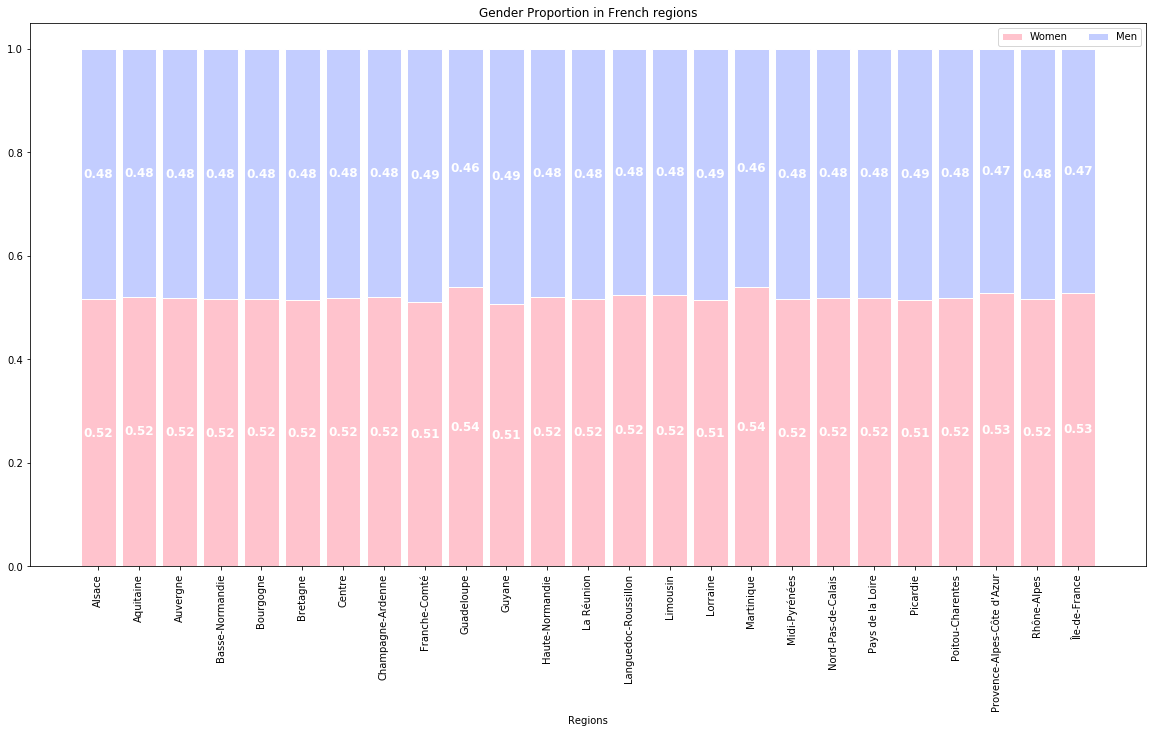

In [17]:
### Plot out stacked bar graph of women/men composition in French regions ###

# Set out config for the graph
barWidth = 0.85
fig = plt.figure(figsize=(20,10))

# Create women Bars (pink)
pinkbar = plt.bar(regions_range, women_percent, color='#FFC3CD', edgecolor='white', width=barWidth, label='Women')
# Create men Bars (blue)
bluebar = plt.bar(regions_range, men_percent, bottom=women_percent, color='#C3CDFF', edgecolor='white', width=barWidth, label='Men')

# Custom x axis
plt.xticks(regions_range, regions, rotation=90)
plt.xlabel("Regions")

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1,1), ncol=2)

# Set title
plt.title('Gender Proportion in French regions')

# Labelling stacked bars with their respective values
for r1, r2 in zip(pinkbar, bluebar):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%.2f" % h1, ha="center", va="center", color="white", fontsize=12, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%.2f" % h2, ha="center", va="center", color="white", fontsize=12, fontweight="bold")

# Show visualisation
plt.show()

As seen from above visualisation, all French regions have balanced gender composition with the median gender composition being 52% women and 48% men amongst regions. 
The regions with the greatest gender imbalance are Guadeloupe and Martinque with both regions having a gender composition of 54% women and 46% men; women populations in these regions are 8.7% higher than men populations.
The regions with gender populations being the most similar in size are Franche-Comte, Guyane, Lorraine and Picardie which have a composition of 51% women and 49% men. 
Another key insight is that there are more women than men for all regions despite the populations of both genders being very similar in size, with a maximum deviation of 8.7% as mentioned above. 
With relatively well-balanced gender distribution amongst all regions, France does not face the issue of overpopulation of a specific gender which is an issue that Latvia faces as Latvia has 85 men per 100 women in the country as of a 2016 estimate;  a staggering 17.6% difference between women and men populations.


#### Visualisation 2 - Population Age Pyramid Analysis (Figure 2.1)

In [18]:
### Data preparation/wrangling ###

# Obtain overall aggregated sum of women and men in different age categories
overall_age_pyramid_data = pop_data.groupby(['AGEQ80_17', 'SEXE'])[["NB"]].sum().reset_index()

# Separate overall pyramid data into women and men dataframes
pyramid_women = overall_age_pyramid_data[overall_age_pyramid_data['SEXE'] == 2].drop('SEXE', axis=1).reset_index(drop=True)
pyramid_men = overall_age_pyramid_data[overall_age_pyramid_data['SEXE'] == 1].drop('SEXE', axis=1).reset_index(drop=True)

# Rename gender population column name before joining dataframes
pyramid_women.rename(columns={'NB': 'Women'}, inplace=True)
pyramid_men.rename(columns={'NB': 'Men'}, inplace=True)

# Join women and men dataframes
overall_age_pyramid_data = pyramid_women.set_index('AGEQ80_17').join(pyramid_men.set_index('AGEQ80_17'), how='inner').reset_index()

# Rename age column
overall_age_pyramid_data.rename(columns={'AGEQ80_17': 'Age Group'}, inplace=True)

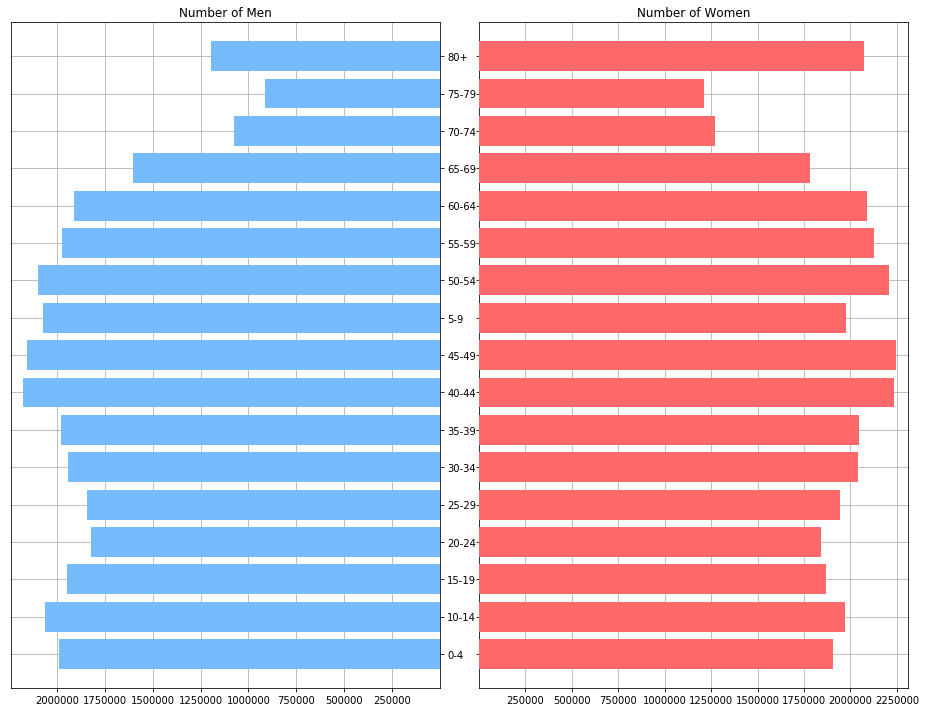

In [19]:
# Plot out Age Pyramid of population data from all French towns

age = overall_age_pyramid_data['Age Group'].apply(lambda x: '-'.join([str(x), str(x+4)]) if x != 80 else '80+')
pyramid_women_values = overall_age_pyramid_data['Women']
pyramid_men_values = overall_age_pyramid_data['Men']
xtick_list = range(250000,3000000,250000)

y = age

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(13,10))
axes[0].barh(y, pyramid_men_values, align='center', color='xkcd:sky blue', zorder=10)
axes[0].set(title='Number of Men')
axes[1].barh(y, pyramid_women_values, align='center', color='#FF6969', zorder=10)
axes[1].set(title='Number of Women')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=y, xticks=xtick_list, xticklabels=xtick_list)
axes[1].set(yticks=y, yticklabels=y, xticks=xtick_list, xticklabels=xtick_list)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

fig.savefig('Population Age Pyramid Analysis.png')

The gender populations pivoted by age are largely similar in size with a difference of no greater than 50,000 in terms of population size between gender populations of the same age group. The only exception can only be observed when comparing gender populations of women and men aged 80 and above with men having a population of approximately 1,200,000 whilst the women population is at nearly 2,100,000, almost twice of its male counterpart population. This can be attributed to women having a longer life expectancy than men and the actual demographic figures from CIA supports the data with the life expectancy of men in France being 78.8 years and women being 85.2 years according to a 2017 estimate .
Another key insight that can be made from the visualisation is that the gender population of men aged 0-19 have a higher population than their female counterparts with the greatest difference at around 100,000. 
For population aged 20-24, both genders have almost identical population sizes according to the visualisation.
Other than population aged 0-24, a pattern can be observed from population belonging to the 25-80+ age groups.  For each of these age groups, women have a higher population size than men and the difference become even more stark as the age group increases. 

### Geographic Visualisations
#### Visualisations 3, 4, 5 & 6 - Geospatial Analysis of Job Class Income

This section covers the analysis of income for the 4 job classes provided in the data (Executive, Middle Manager, Employee, Worker) with Executive commanding the highest mean salary and Worker commanding the lowest mean salary amongst the 4 job classes. The income choropleth maps of these 4 job classes can be viewed below from Figure 3.1 to Figure 3.4.
Fisher Jenks natural break optimisation is used as it maximises variance between data clusters while minimising variance of data points within clusters. 
The intensity of the colour displayed in the choropleth map refers to the level of income that individuals of a certain job class earn at that town.
From the 4 visualisations, the capital of France, Paris, is the prime location for any individual looking to secure a job with the highest pay of any job class.  The second-best location in terms of salary for all job classes is the city of Lyon as seen from a slightly less intense cluster in the region .
Besides Paris and Lyon, the executive income choropleth map (Figure 3.1) has a noticeable trend which can be seen from northern, western and south-eastern borders which are the coastal borders that mainland France has. A possible explanation is that there are a sizable number of large shipping and coastal trade companies situated along the France’s coastlines which compensates executives decently for their service.
The middle manager income choropleth map (Figure 3.2) tells a different story as the middle managers situated at coastal areas are not compensated significantly more than their landlocked middle manager counterparts. The next 2 cities where middle managers are the most well compensated are Nice and Marseille, large cities with plenty of medium and large firms.

The employee income choropleth map (Figure 3.3) has a greater contrast in terms of colour intensity (income) between the cities of Paris and Lyon versus Nice and Marseille.  A probable explanation is that entry-level and non-managerial office employees are paid significantly greater in the former cities than the latter cities due to the relatively high number of Multinational Corporations that have establish themselves in Paris and Lyon as compared to smaller cities such as Nice and Marseille.
The worker income choropleth map (Figure 3.4) has a sparsely coloured map with Paris and Lyon still being the most well-paid cities in France for a worker to work in. However, the French border directly east of Lyon shows a cluster of saturated blue which indicates that workers there are paid better significantly better than the rest of the workers in France excluding Paris and Lyon. The likely cause of this disparity in worker’s income is because that the eastern bordering region is a mountainous region known as the Alps that extends to 8 countries. Coupled with the fact that Mont Blanc, the tallest mountain of the Alps is situated in the same region, there is little to wonder why workers in the region are paid relatively higher than their peers in other regions as the higher altitude and tougher working conditions justifies the higher salary. 


In [20]:
# Create new dataframe of salary and geodata by performing inner join of salary data and town geodata
salary_geodata = town_geodata.set_index('code').join(salary_data.set_index('CODGEO'), how='inner').reset_index()

### Visualisation 3 (Figure 3.1)

C:\Users\lim_j\AppData\Local\conda\conda\envs\py36\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


Text(0.5,1,'Income Choropleth Map: Executive')

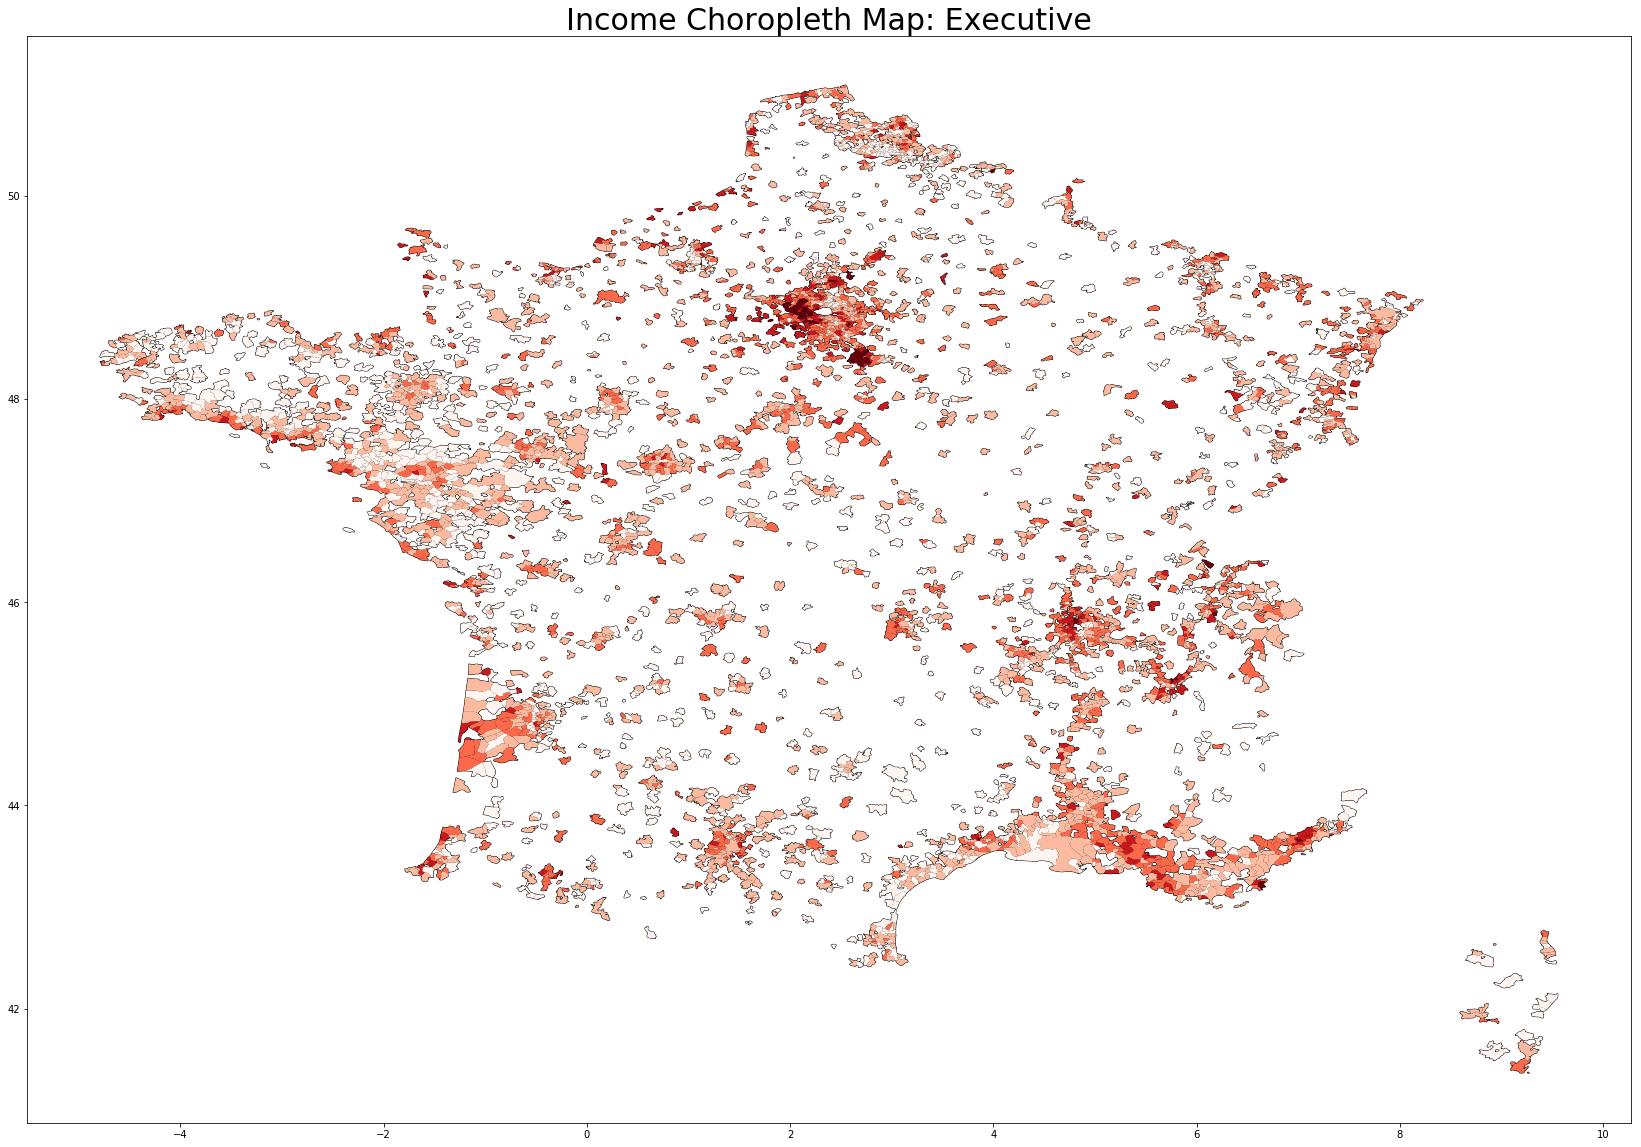

In [21]:
base = salary_geodata.plot(color='white', edgecolor='black', figsize=(40,20))
choropleth = salary_geodata.plot(column='SNHMC14', cmap='Reds', figsize=(40,20), ax=base, scheme='fisher_jenks')
base.set_title("Income Choropleth Map: Executive", fontsize=30)

### Visualisation 4 (Figure 3.2)

Text(0.5,1,'Income Choropleth Map: Middle Manager')

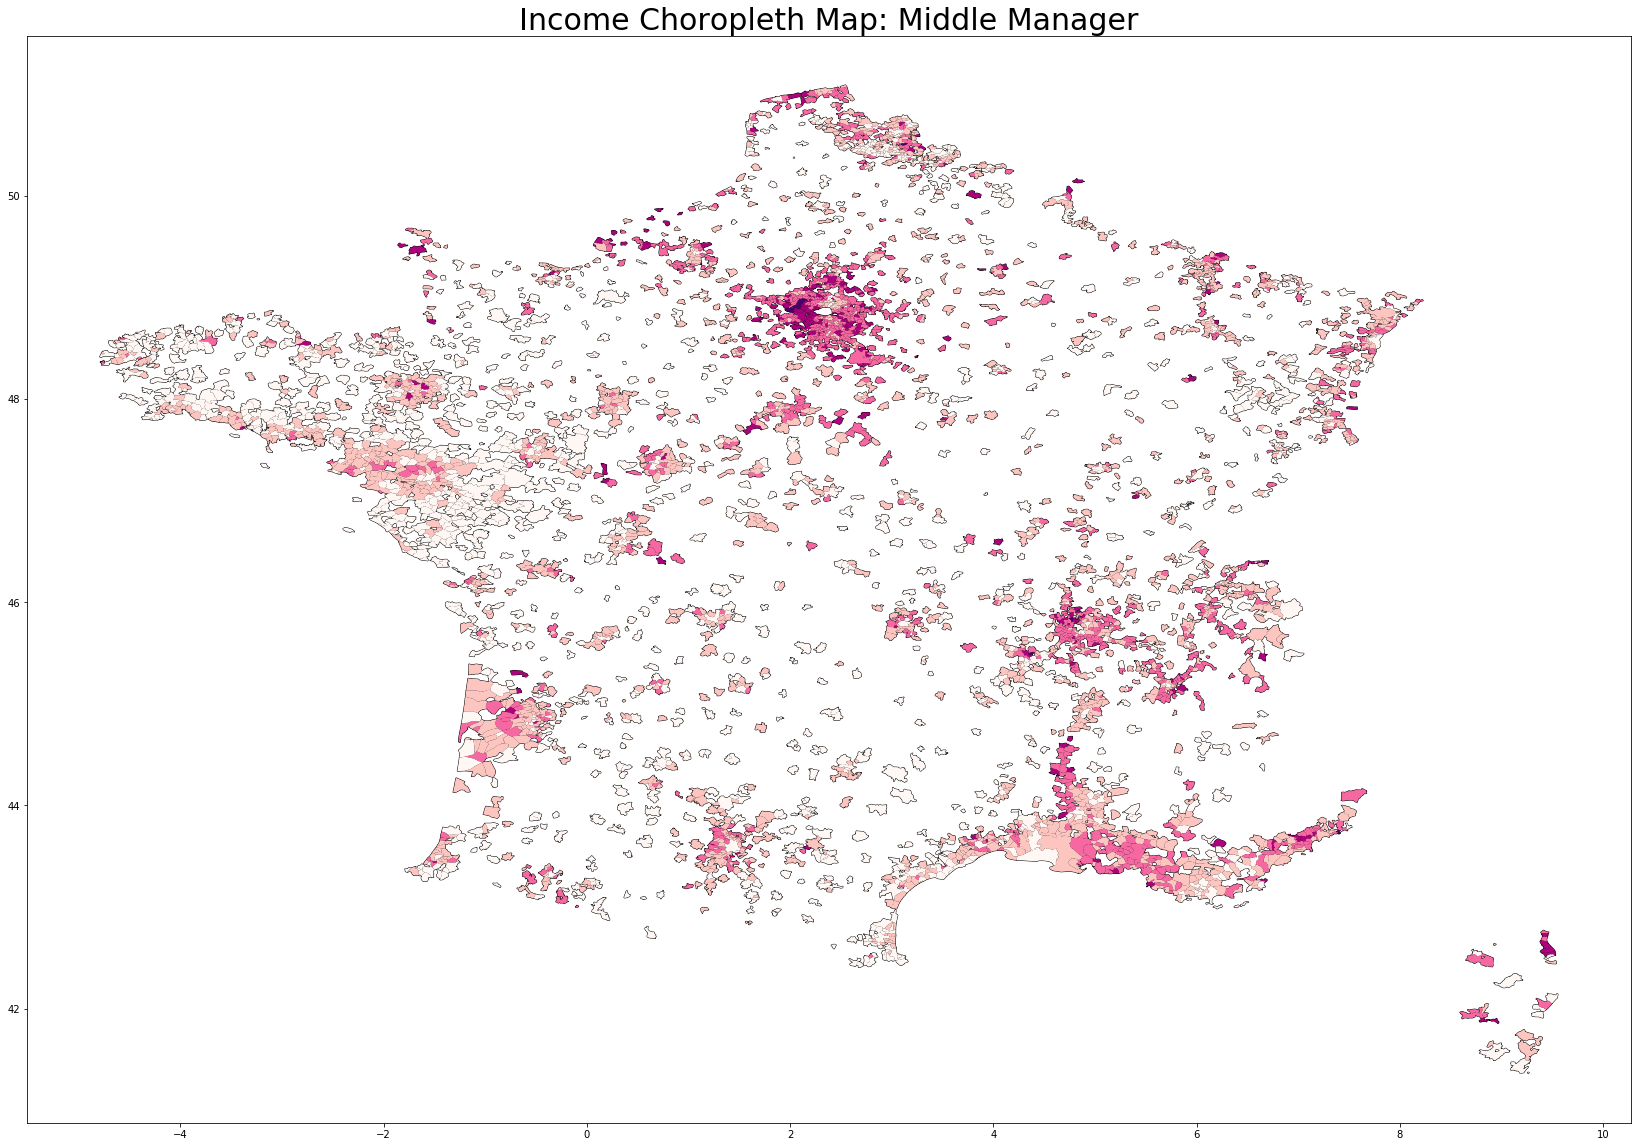

In [22]:
base = salary_geodata.plot(color='white', edgecolor='black', figsize=(40,20))
salary_geodata.plot(column='SNHMP14', cmap='RdPu', figsize=(40,20), ax=base, scheme='fisher_jenks')
base.set_title("Income Choropleth Map: Middle Manager", fontsize=30)

### Visualisation 5 (Figure 3.3)

Text(0.5,1,'Income Choropleth Map: Employee')

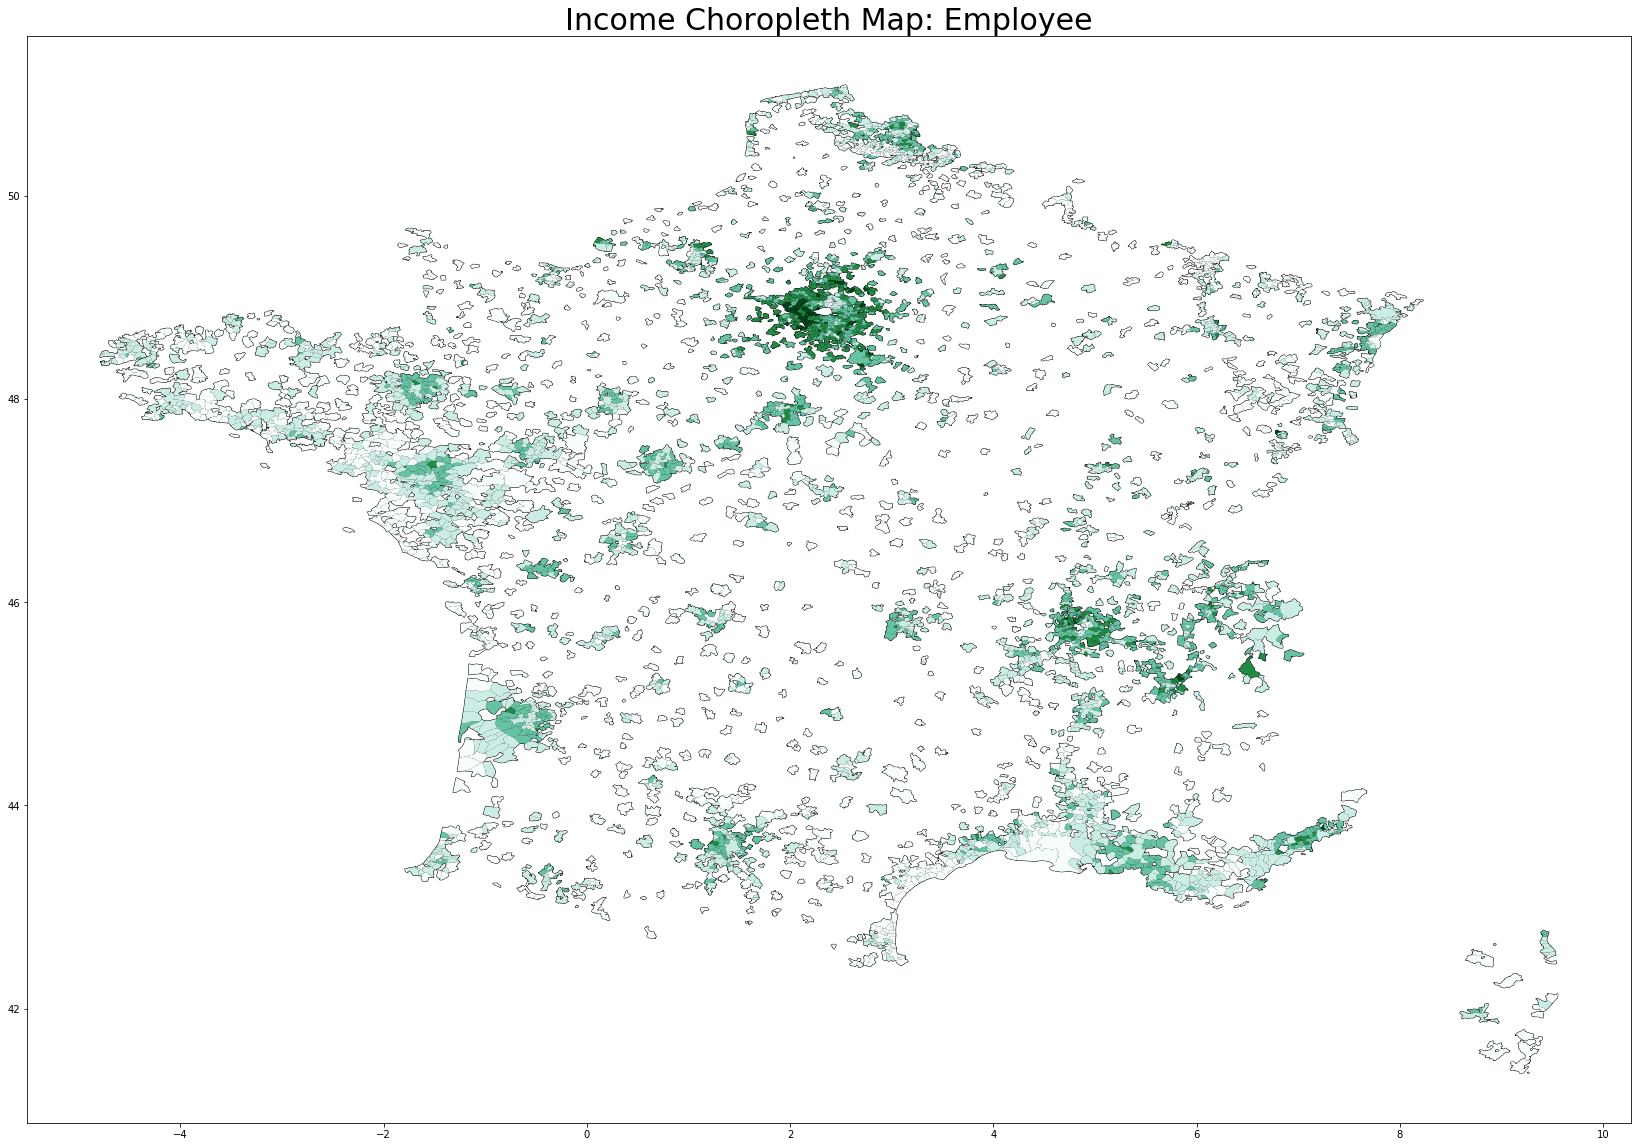

In [23]:
base = salary_geodata.plot(color='white', edgecolor='black', figsize=(40,20))
salary_geodata.plot(column='SNHME14', cmap='BuGn', figsize=(40,20), ax=base, scheme='fisher_jenks')
base.set_title("Income Choropleth Map: Employee", fontsize=30)

### Visualisation 6 (Figure 3.4)

Text(0.5,1,'Income Choropleth Map: Worker')

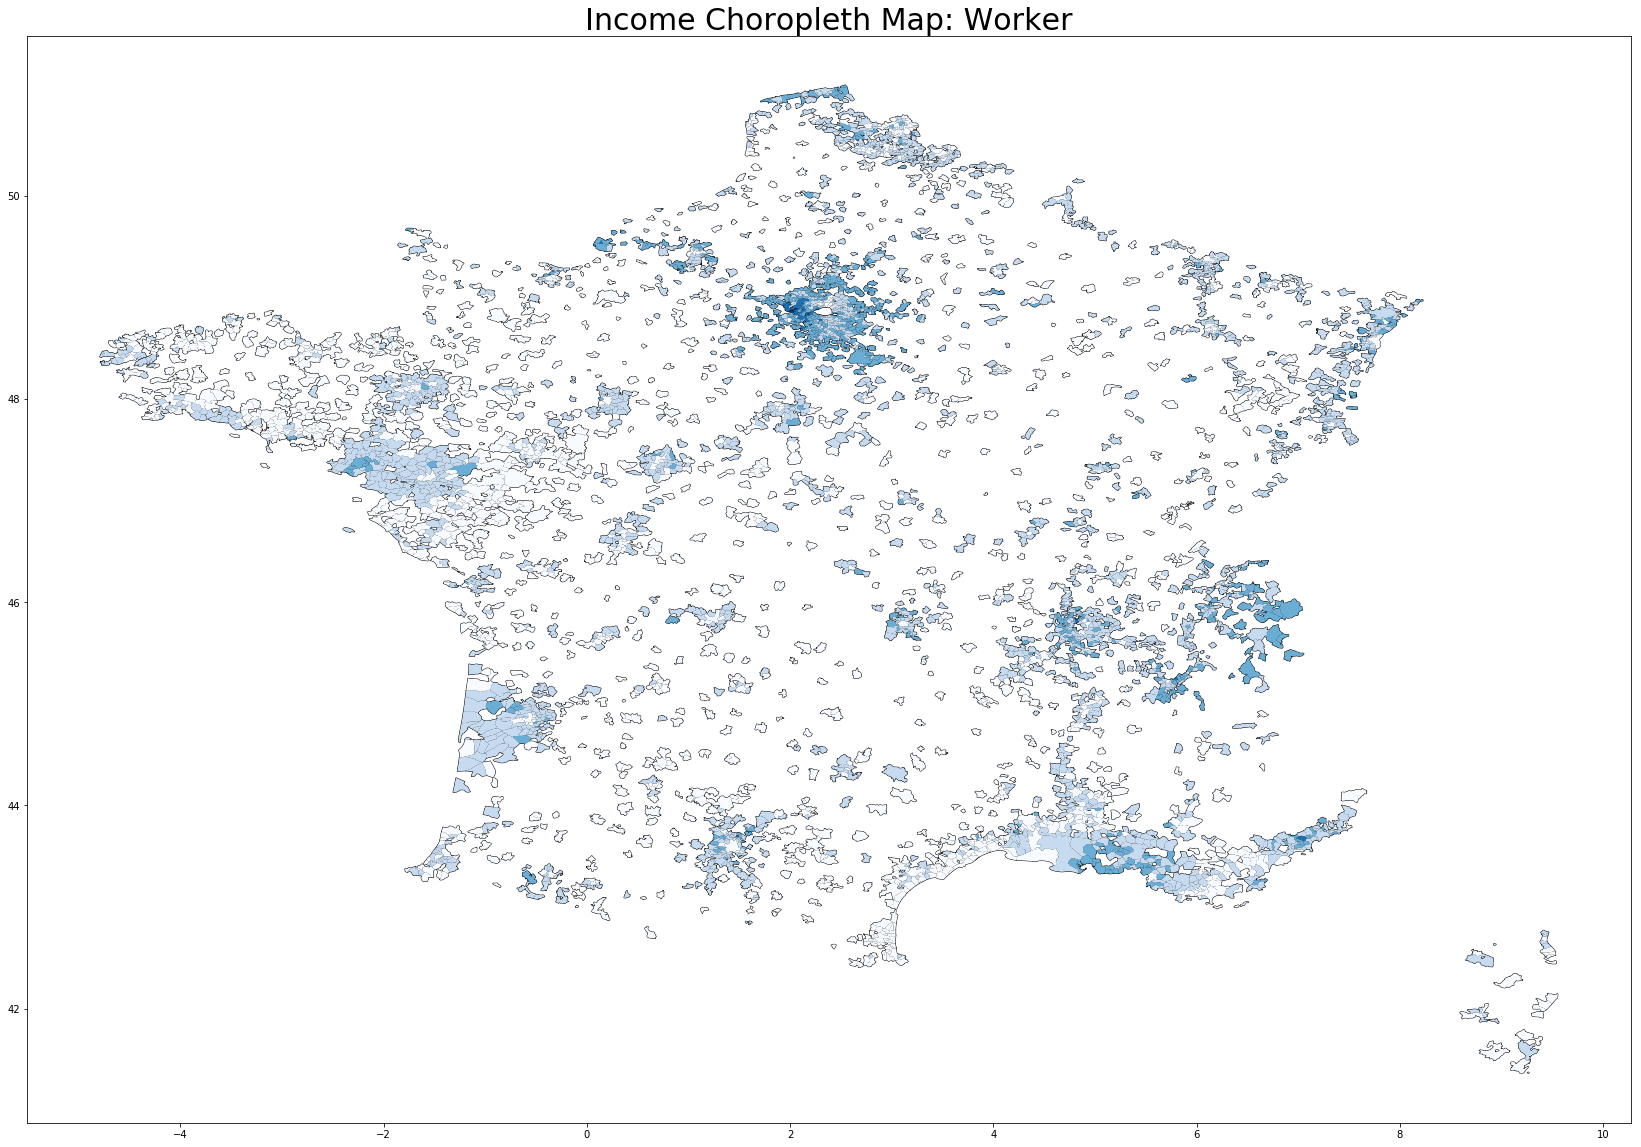

In [24]:
base = salary_geodata.plot(color='white', edgecolor='black', figsize=(40,20))
salary_geodata.plot(column='SNHMO14', cmap='Blues', figsize=(40,20), ax=base, scheme='fisher_jenks')
base.set_title("Income Choropleth Map: Worker", fontsize=30)

#### Visualisation 7 - Economic Analysis of Top Paying Towns by Job Class (Figure 4.1)

In [25]:
# Data preparation, join firm data with salary geodata
salary_geodata.drop(columns=['LIBGEO'], inplace=True)
firm_geodata = salary_geodata.set_index('index').join(firm_data.set_index('CODGEO'), how='inner').reset_index()

# Obtain top performing town data
top_exec_town = firm_geodata.sort_values('SNHMC14', axis=0, ascending=False).reset_index(drop=True).loc[0].filter(items=['nom', 'E14TS1', 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200', 'E14TS500']) # Saint-Nom-la-Bretèche
top_middlemgr_town = firm_geodata.sort_values('SNHMP14', axis=0, ascending=False).reset_index(drop=True).loc[0].filter(items=['nom', 'E14TS1', 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200', 'E14TS500']) # Chambourcy
top_emp_town = firm_geodata.sort_values('SNHME14', axis=0, ascending=False).reset_index(drop=True).loc[0].filter(items=['nom', 'E14TS1', 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200', 'E14TS500']) # Saint-Witz
top_worker_town = firm_geodata.sort_values('SNHMO14', axis=0, ascending=False).reset_index(drop=True).loc[0].filter(items=['nom', 'E14TS1', 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200', 'E14TS500']) # Fourqueux

# Label towns accordingly
top_exec_town['nom'] = top_exec_town['nom'] + '\n(Top Paying Executive Town)'
top_middlemgr_town['nom'] = top_middlemgr_town['nom'] + '\n(Top Paying Middle Manager Town)'
top_emp_town['nom'] = top_emp_town['nom'] + '\n(Top Paying Employee Town)'
top_worker_town['nom'] = top_worker_town['nom'] + '\n(Top Paying Worker Town)'

# Concatenate Series and tidy up dataframe
top_towns = pd.concat([pd.DataFrame(top_exec_town).transpose(), pd.DataFrame(top_middlemgr_town).transpose(), 
                       pd.DataFrame(top_emp_town).transpose(), pd.DataFrame(top_worker_town).transpose()]).set_index('nom')
top_towns.rename(columns={'nom': 'Town Name', 'E14TS1': '1-5', 'E14TS6': '6-9', 'E14TS10': '10-19', 
                  'E14TS20': '20-49', 'E14TS50': '50-99', 'E14TS100': '100-199', 'E14TS200': '200-499', 'E14TS500': '500+'}, inplace=True)

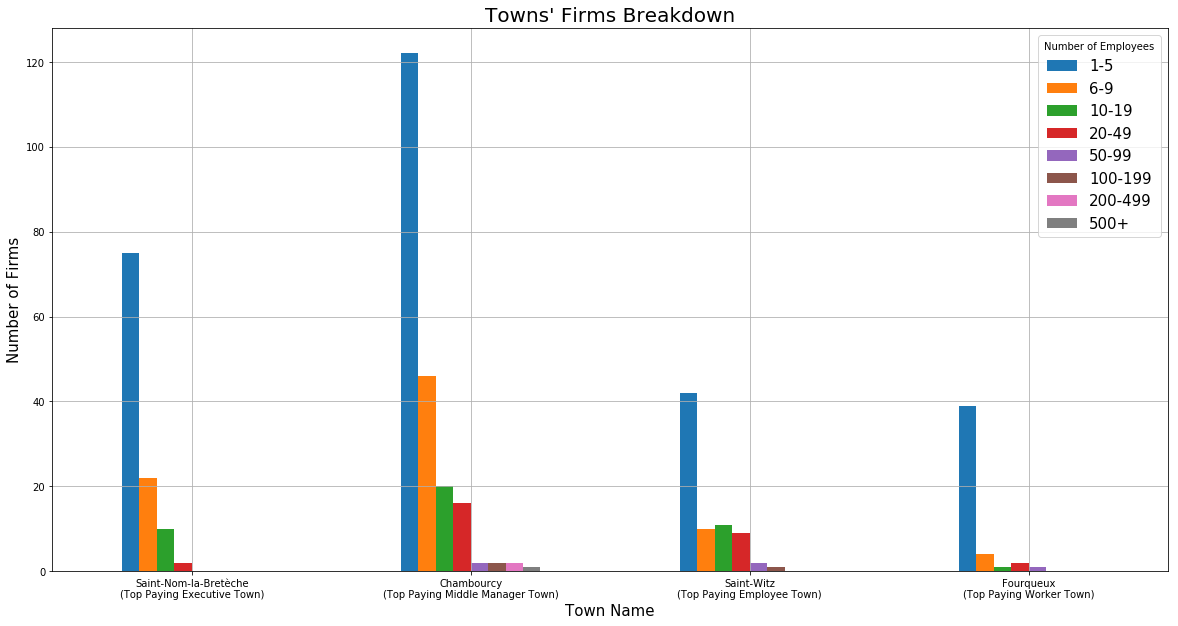

In [26]:
# Plot out grouped bar chart
axes = top_towns.plot.bar(figsize=(20,10), rot=0, grid=True)
axes.set_title("Towns' Firms Breakdown", fontsize=20)
axes.set_ylabel("Number of Firms", fontsize=15)
axes.set_xlabel("Town Name", fontsize=15)
axes.legend(title='Number of Employees', fancybox=True, fontsize=15)

This section consists of further exploration and analysis of the top paying towns for each job class.
Saint-Nom-la-Breteche, the top executive paying town, does not have any large firms (>= 250 employees) in the town and only has firms range from 1 to 49 employees. A contributing factor to why it is the top executive paying town is that it is a highly wealthy town and that residents pay a premium for services in this area hence resulting in higher mean net salary for executives working in the town. 
Chambourcy, the top middle manager paying town, has a relatively high number of small firms consisting of 1-19 employees at approximately 180 firms. It is the only town amongst the 4 towns that has firms of 200-499 employees and 500+ employees situated in the town. The presence of large firms in the area is makes it evident why middle managers are the most well payed in this area as the demand for middle managers is extremely high for larger companies which leads to higher salaries for this job class.
Saint-Witz, the top employee paying town, does not have any large firms by INSEE definition with approximately 13 medium-sized firms (20-250 employees) and approximately 20 small-sized firms with the exclusion of the lower-end sized firms (1-5 employees). With the absence of large firms coupled with the presence several small and medium enterprises, it is evident that the town has a relatively lower demand for middle manager or executives than Saint-Nom-la-Breteche and Chambourcy. This leads to companies paying relatively more to their employee job class staff who are the main drivers behind their businesses. 
Fourqueux, the top worker paying town, is void of large firms and almost void of medium-sized firms. Minimally-sized firms take up the bulk of the town’s firm composition with total number of minimal-sized firms (1-5 employees) accounting for an approximate 90% of all firms in the town. The key explanation behind the distribution can be that the town comprises of mainly workshops, sole proprietorships and family-owned businesses. Workshops, sole proprietorships and family-owned businesses tend to be small businesses that have 5 or less members working at the company. In addition, the town’s proximity to central Paris validates why this small town is the top worker paying town.
Lastly, all four towns are within a 20-mile from central Paris and hence supports the income choropleth maps of the 4 job classes (Figure 3.1 to Figure 3.4).


### Predictive Analytics
#### Predicting Mean Net Income of Town

Features for predicting Mean Net Income:
1. num small firms (1-19)
2. num med firms (20-199)
3. num large firms (>= 250)
4. administrative centre

MALE
5. 21 = adults living in couple without child
6. 22 = adults living in couple with children
7. 23 = adults living alone with children
8. 31 = persons not from family living in the home
9. 32 = persons living alone

FEMALE
10. 21 = adults living in couple without child
11. 22 = adults living in couple with children
12. 23 = adults living alone with children
13. 31 = persons not from family living in the home
14. 32 = persons living alone

In [27]:
# Join relevant dataframes
firm_geo_data = firm_data.set_index('CODGEO').join(geo_data.set_index('CODGEO'), how='inner')
firm_geo_salary_data = firm_geo_data.join(salary_data.set_index('CODGEO'), how='inner', lsuffix='_firm_geo', rsuffix='_salary')

# Population data columns to filter for aggregation
pop_filter_cols = ['CODGEO', 'MOCO', 'SEXE', 'NB']
pop_filtered_df = pop_data.filter(pop_filter_cols)
pop_filtered_df = pop_filtered_df.groupby(['CODGEO', 'MOCO', 'SEXE'])[['NB']].sum().reset_index()
pop_filtered_df['SEXE-MOCO'] = (pop_filtered_df['SEXE'].apply(lambda value: str(value)) 
                                + pd.Series(len(pop_filtered_df['SEXE']) * ['-',]) 
                                + pop_filtered_df['MOCO'].apply(lambda value: str(value)))
pop_filtered_df = pop_filtered_df.filter(['CODGEO', 'SEXE-MOCO', 'NB'])
pivoted_pop_filtered_df = pop_filtered_df.pivot_table('NB', 'CODGEO', 'SEXE-MOCO').reset_index(drop=False)
pivoted_pop_filtered_df = pivoted_pop_filtered_df.reindex(['CODGEO', '1-11', '1-12', '1-21', '1-22', '1-23', '1-31', '1-32', 
                                                                '2-11', '2-12', '2-21', '2-22', '2-23', '2-31', '2-32'], axis=1)

# Filter columns
cols = ['CODGEO', 'chef.lieu_région', 'SNHM14', 'E14TS1', 'E14TS6', 
        'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200', 'E14TS500']
preprocessed_df = firm_geo_salary_data.filter(cols)

# Join filtered dataframe with aggregated and unwinded dataframe
preprocessed_df = preprocessed_df.join(pivoted_pop_filtered_df.set_index('CODGEO'), how='inner')

In [28]:
# Drop irrelevant MOCO columns, only keep MOCO columns that is tied to adults and people living alone 
# (Assumption that they contribute to the economy and plays a large role in determing the mean net salary)
preprocessed_df = preprocessed_df.drop(columns=['1-11', '1-12', '2-11', '2-12'])

# Encode categorical feature, chef.lieu_région 
label_enc = LabelEncoder()
preprocessed_df['chef.lieu_région'] = label_enc.fit_transform(preprocessed_df['chef.lieu_région'])

# Merge firm-related features, by clustering into Small (1-19), Medium (20-249) and Large (250+) firms 
# based on INSEE definition of Small and Medium enterprises as seen on https://www.insee.fr/en/metadonnees/definition/c1962
# A uniform distribution for the number of employees is assumed for firms who has 200-499 employees (E14TS200)
# Hence, formula for Small, Medium and Large firms are as of follow:
# Number of small firms = E14TS1 + E14TS6 + E14TS10
# Number of medium firms = E14TS20 + E14TS50 + E14TS100 + (1/6 * E14TS200)
# Number of large firms = (5/6 * E14TS200) + E14TS500
preprocessed_df['num_small_firms'] = preprocessed_df['E14TS1'] + preprocessed_df['E14TS6'] + preprocessed_df['E14TS10']
preprocessed_df['num_medium_firms'] = preprocessed_df['E14TS20'] + preprocessed_df['E14TS50'] + preprocessed_df['E14TS100'] + ((1/6) * preprocessed_df['E14TS200'])
preprocessed_df['num_large_firms'] = ((5/6) * preprocessed_df['E14TS200']) + preprocessed_df['E14TS500']
preprocessed_df.drop(columns=['E14TS1', 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200', 'E14TS500'], inplace=True)

In [29]:
# Explore the correlation between features
preprocessed_df.corr()

,chef.lieu_région,SNHM14,1-21,1-22,1-23,1-31,1-32,2-21,2-22,2-23,2-31,2-32,num_small_firms,num_medium_firms,num_large_firms
chef.lieu_région,1.000000,0.132405,0.048495,0.052115,0.048208,0.049404,0.047400,0.048578,0.052097,0.044473,0.048532,0.045756,0.045684,0.047289,0.050256
SNHM14,0.132405,1.000000,0.206139,0.211150,0.203976,0.205019,0.203469,0.205879,0.211141,0.194088,0.205386,0.204591,0.208433,0.211657,0.220460
1-21,0.048495,0.206139,1.000000,0.997388,0.997509,0.995277,0.997767,0.999975,0.997369,0.991339,0.996404,0.998116,0.988849,0.989648,0.986068
1-22,0.052115,0.211150,0.997388,1.000000,0.999165,0.990405,0.992208,0.997569,1.000000,0.996439,0.992273,0.992573,0.982036,0.982500,0.979335
1-23,0.048208,0.203976,0.997509,0.999165,1.000000,0.990987,0.993148,0.997731,0.999170,0.997324,0.992808,0.993130,0.981440,0.981848,0.978352
1-31,0.049404,0.205019,0.995277,0.990405,0.990987,1.000000,0.998329,0.994812,0.990375,0.980556,0.999608,0.997979,0.993337,0.994385,0.992077
1-32,0.047400,0.203469,0.997767,0.992208,0.993148,0.998329,1.000000,0.997495,0.992180,0.983857,0.998429,0.999550,0.991756,0.993250,0.990351
2-21,0.048578,0.205879,0.999975,0.997569,0.997731,0.994812,0.997495,1.000000,0.997552,0.991924,0.996036,0.997758,0.987795,0.988675,0.985056
2-22,0.052097,0.211141,0.997369,1.000000,0.999170,0.990375,0.992180,0.997552,1.000000,0.996463,0.992247,0.992543,0.981990,0.982449,0.979283
2-23,0.044473,0.194088,0.991339,0.996439,0.997324,0.980556,0.983857,0.991924,0.996463,1.000000,0.983501,0.983686,0.967872,0.968057,0.963866


In [30]:
# Prepare data for machine learning model training
y = preprocessed_df['SNHM14']
x = preprocessed_df.drop(columns=['SNHM14'])

# Split into training + validation and testing data
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

# Split training + validation into training and validation data
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=15)

# Scale numerical features to number of unit variance away from mean, transforming feature into one with a normal distribution
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_val = scaler.transform(x_val)
scaled_x_test = scaler.transform(x_test)

#### Benchmark Model using Linear Regression

In [31]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(scaled_x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [32]:
y_val_lr_pred = lr_model.predict(scaled_x_val)
lr_rmse = mean_squared_error(y_val, y_val_lr_pred)
lr_r2 = r2_score(y_val, y_val_lr_pred)
print('RMSE:', lr_rmse, ', R2:', lr_r2)

RMSE: 5.412321360335827 , R2: 0.10495066872076408


#### Random Forest Regression Model

In [33]:
rf_model = RandomForestRegressor(100, random_state=15, verbose=1)
rf_model.fit(scaled_x_train, y_train)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=15, verbose=1, warm_start=False)

In [34]:
y_val_rf_pred = rf_model.predict(scaled_x_val)
rf_rmse = mean_squared_error(y_val, y_val_rf_pred)
rf_r2 = r2_score(y_val, y_val_rf_pred)
print('RMSE:', rf_rmse, ', R2:', rf_r2)

RMSE: 3.4117157856287434 , R2: 0.4357958943789796


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
